## Assignment 5 (10 Points): Pipes, Functions, Vectors, and Iterations

In [1]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.6.2"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


### Q1 (3 points): Write a function (named ```plot_cat```) to automatically detect and plot the distributions of all categorical variables in a given dataset. Hint: Use the following keywords:
```
function, for, seq_along, names, if, is.factor, ggplot, geom_bar, labs, theme, print
```

In [2]:
# define the function here

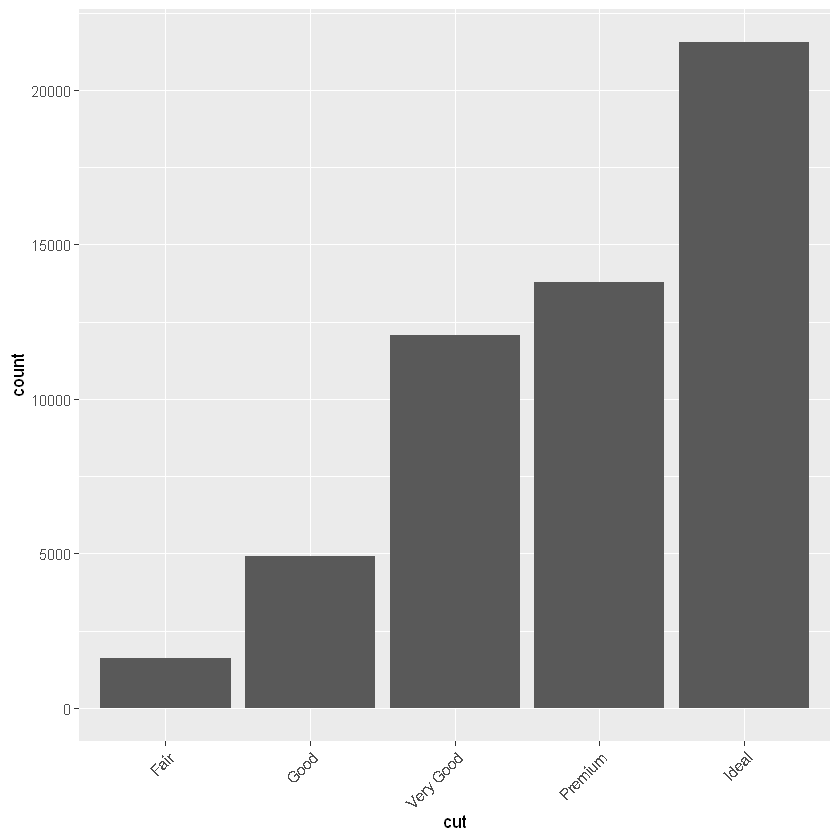

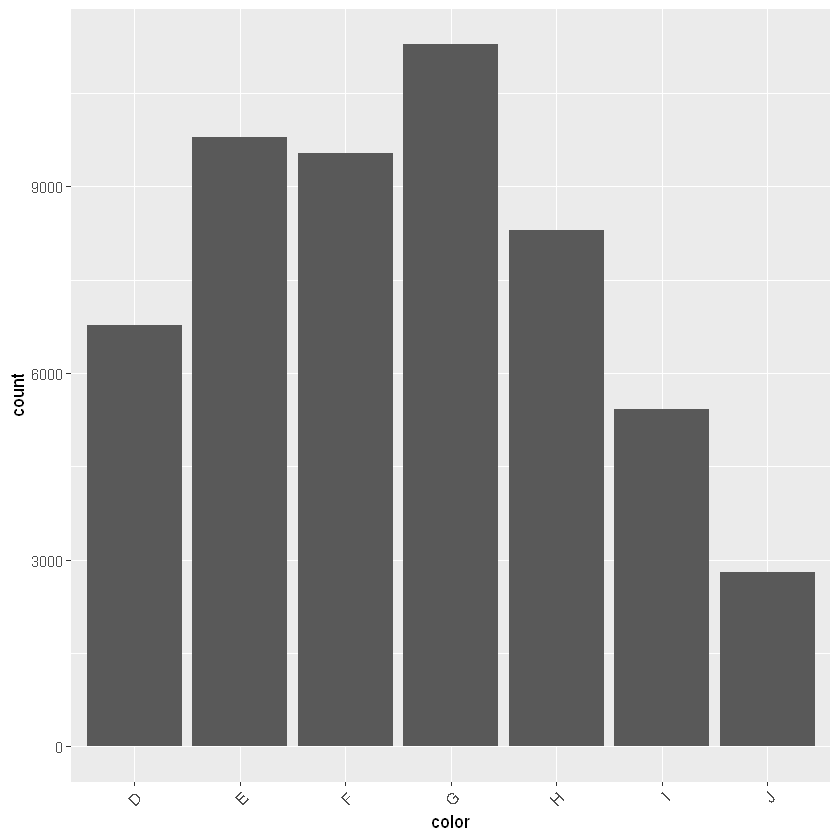

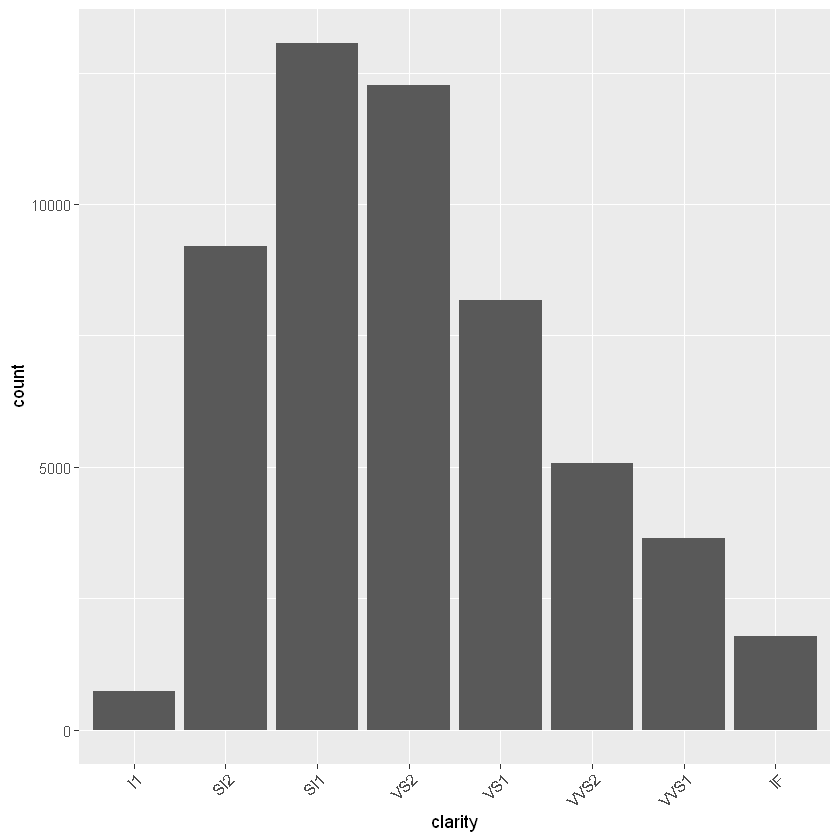

In [3]:
plot_cat<- function(data){
      #create a new dataset with all categorical variables
      catVar<-data %>% keep(is.factor)
      #for each variable, make a bar graph
      for(i in seq_along(catVar)){
              df<-ggplot(data=catVar)+
              geom_bar(aes(x=catVar[[i]]))+
              labs(x=names(catVar[i]))+ # setting labels for x axis
              theme(axis.text.x = element_text(angle = 45,hjust = 1)) # x axis text formatting
              print(df)
              }
          }
#use diamonds dataset as an example
diamonds%>%plot_cat()

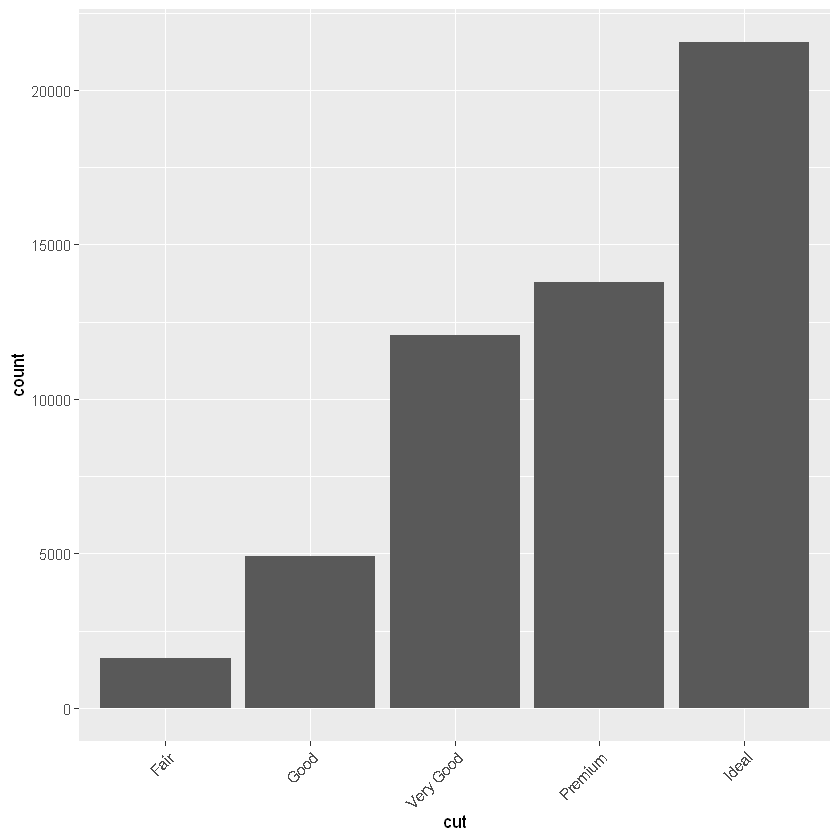

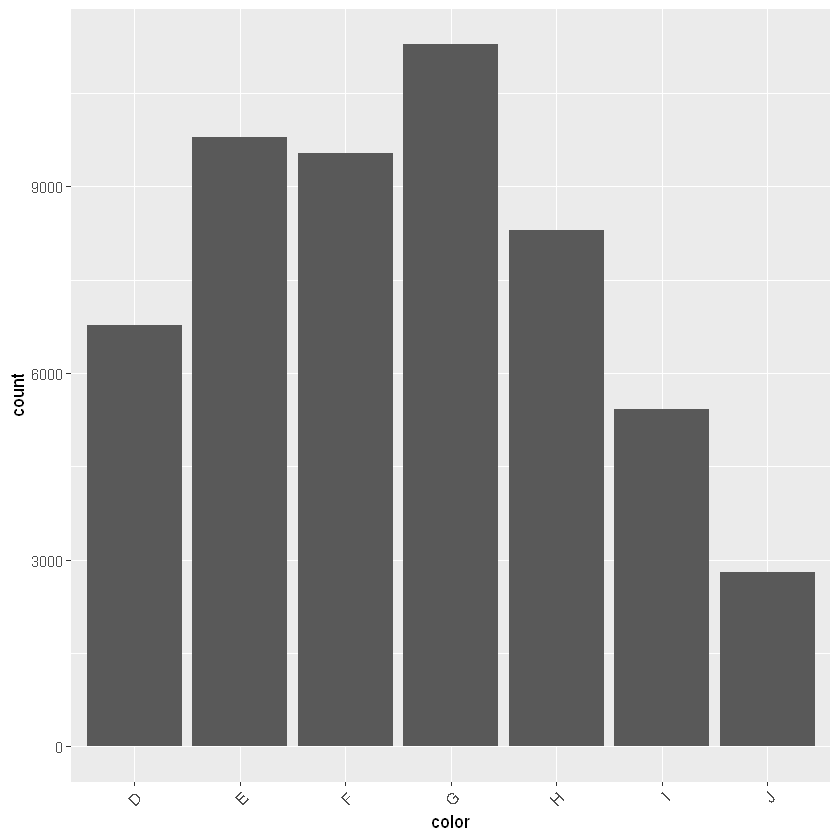

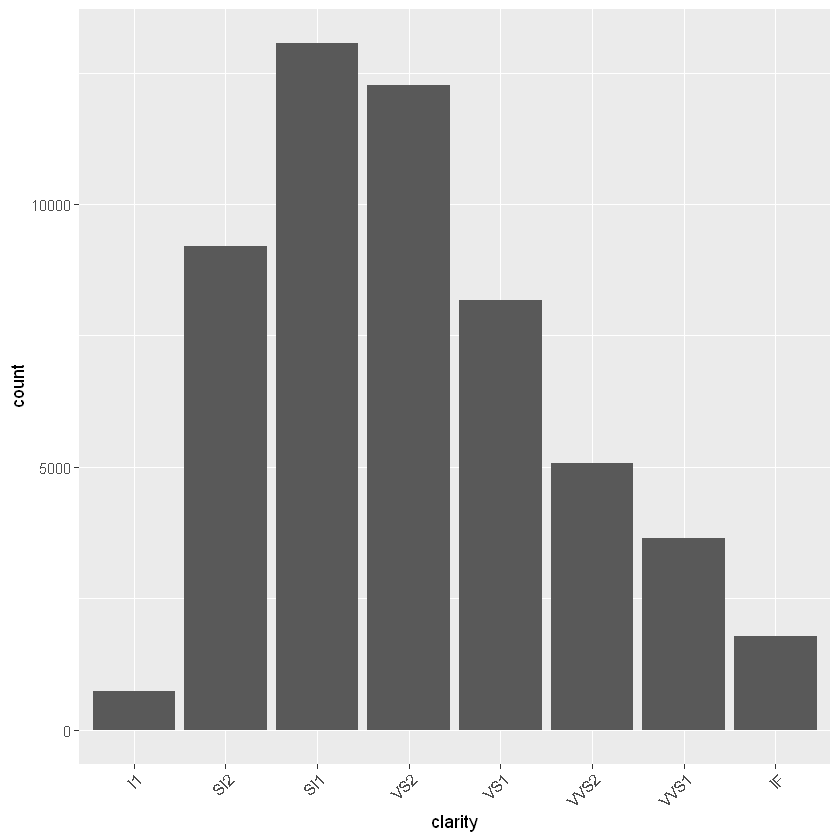

In [4]:
diamonds %>% plot_cat()

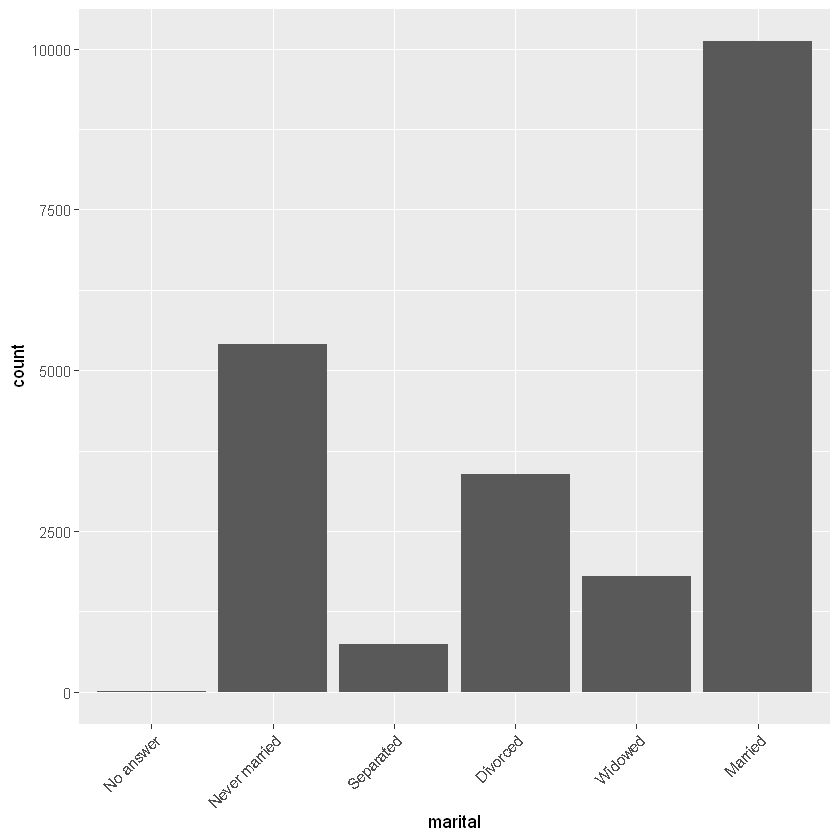

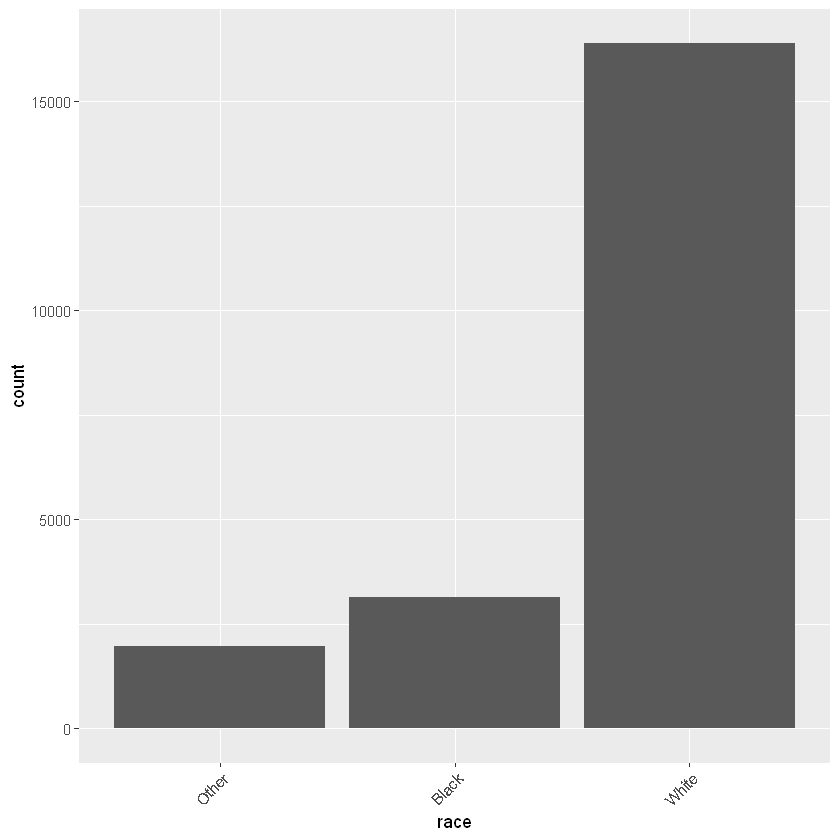

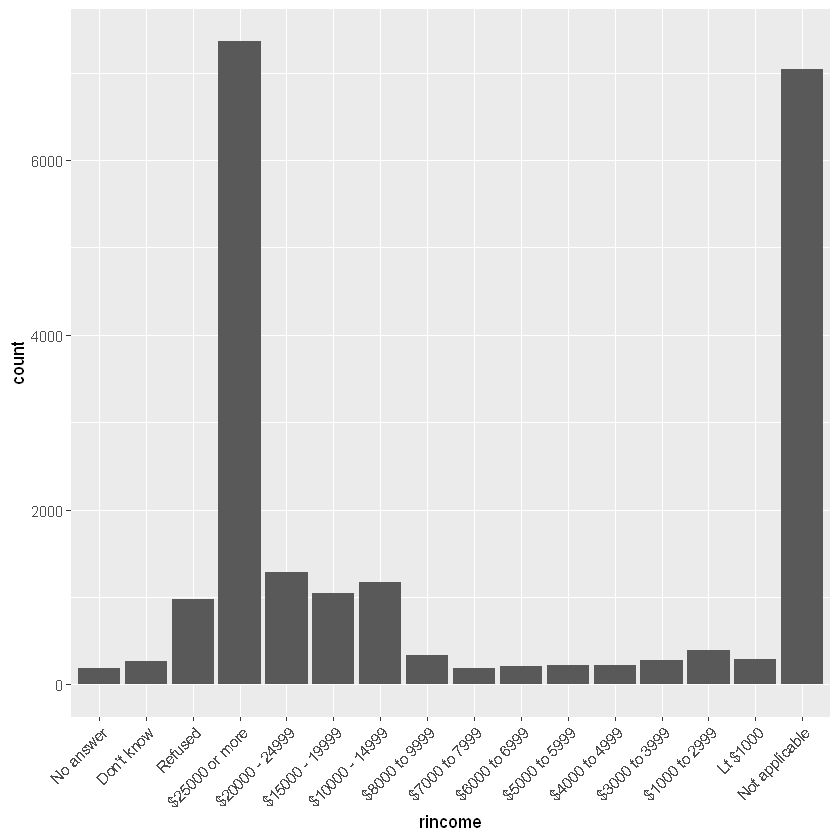

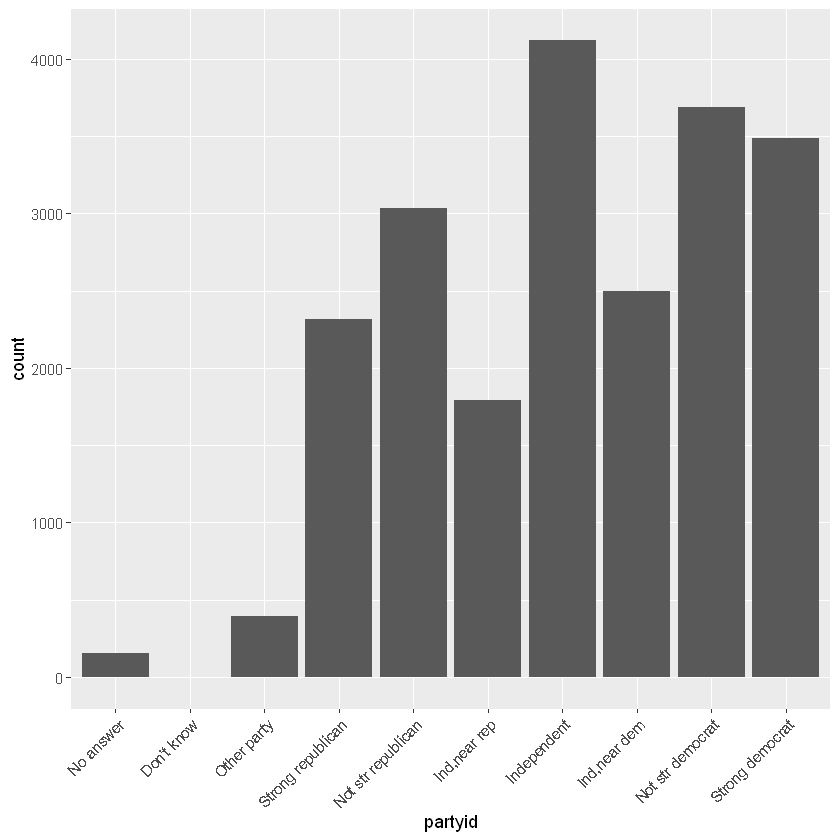

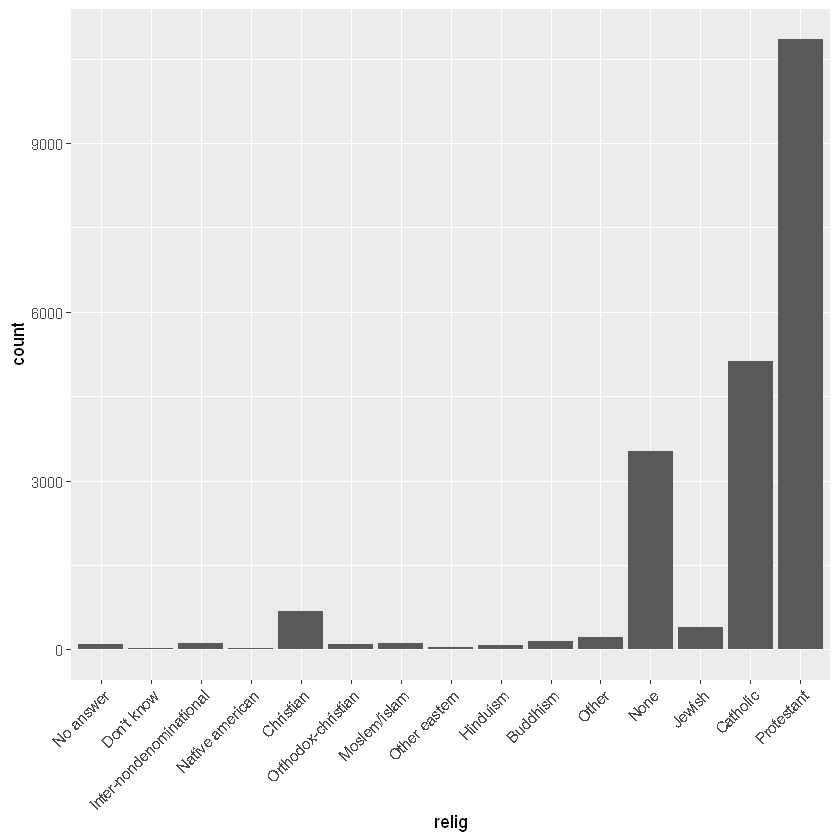

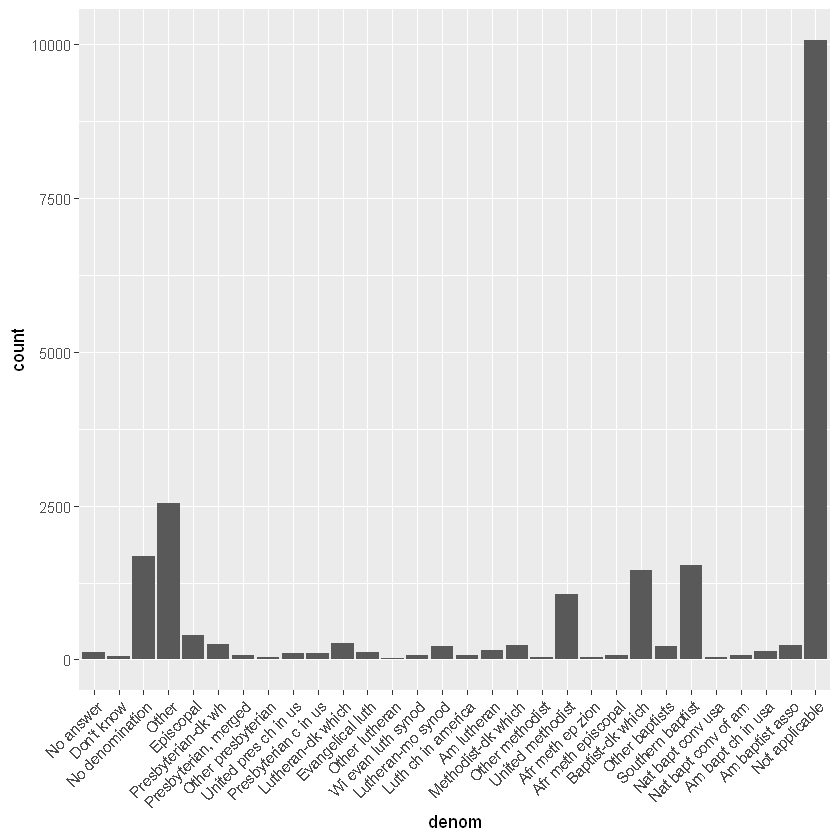

In [5]:
gss_cat %>% plot_cat()

### Q2 (5 points): Write a function (named ```plot_cat_cat```) to automatically detect and plot the *joint* distributions of all *pairs* of categorical variables in a given dataset. Hint: Use the following keywords:
```
function, for, seq_along, names, if, next, is.factor, ggplot, geom_count, labs, theme, print
```

In [6]:
# define the function here

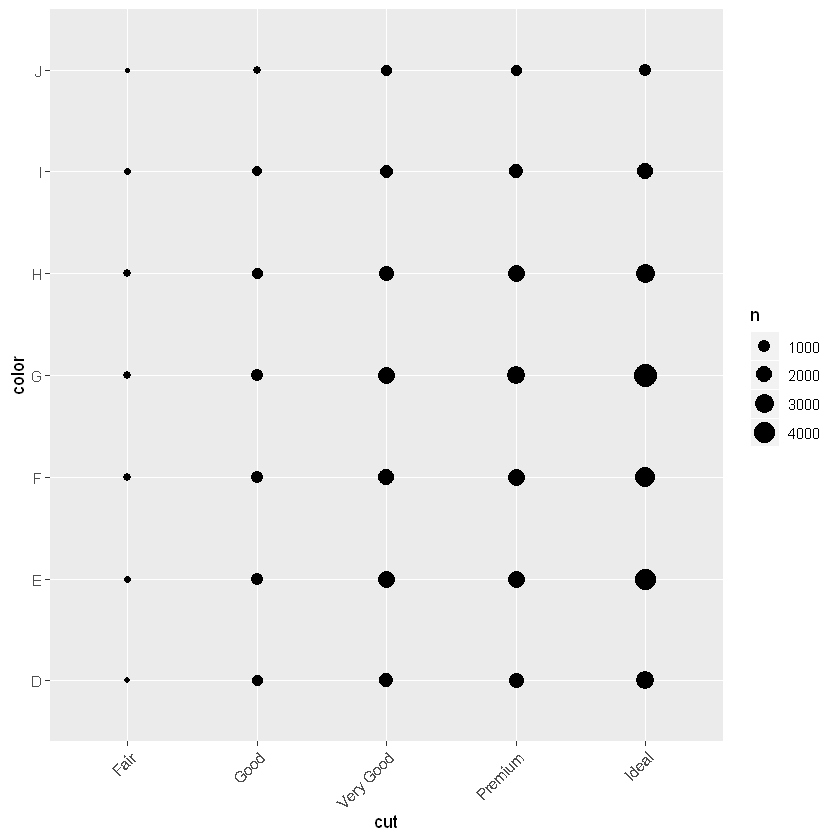

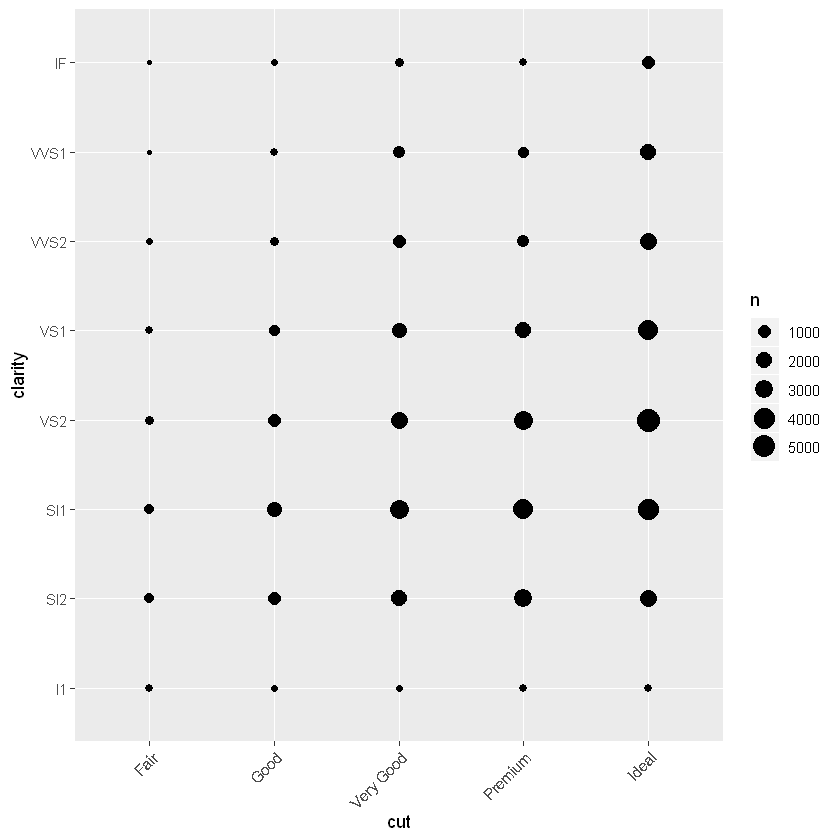

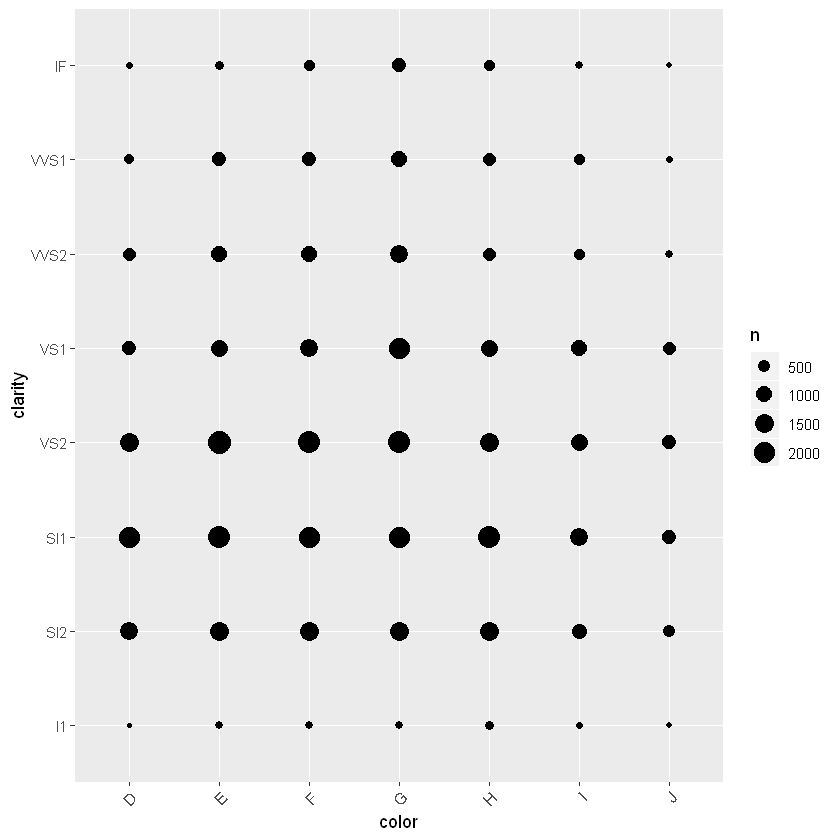

In [32]:
plot_cat_cat<- function(data){
     #create a new dataset with all categorical variables
      catVar<-data %>% keep(is.factor) # alternatively we could have used if(is.factor(data[i]))
     #have two for loops, because we need two variables to create the graph
      for(i in seq_along(catVar)){
          for(j in seq_along(catVar)){
              #j needs to be bigger than i, in order to avoid deplicate graphs
              if(j>i){
                 df<-ggplot(catVar)+
                 geom_count(aes(x=catVar[[i]],y=catVar[[j]]))+
                 labs(x=names(catVar[i]),y=names(catVar[j]))+
                 theme(axis.text.x = element_text(angle = 45,hjust = 1))
                 print(df)
              }
          }
      }
          }
#use diamonds dataset as an example
diamonds%>% plot_cat_cat

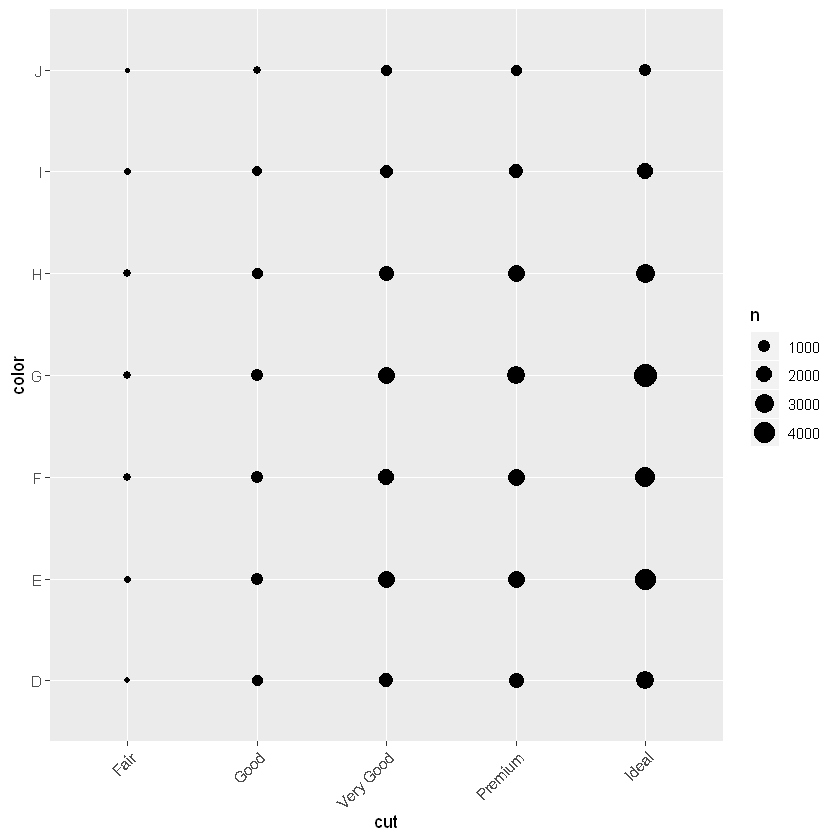

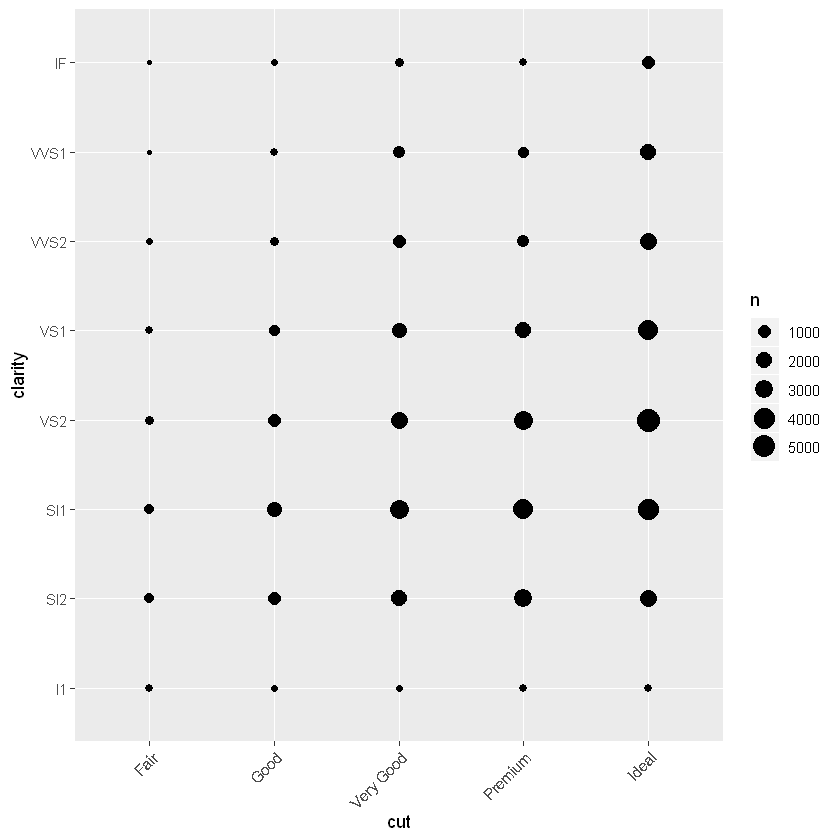

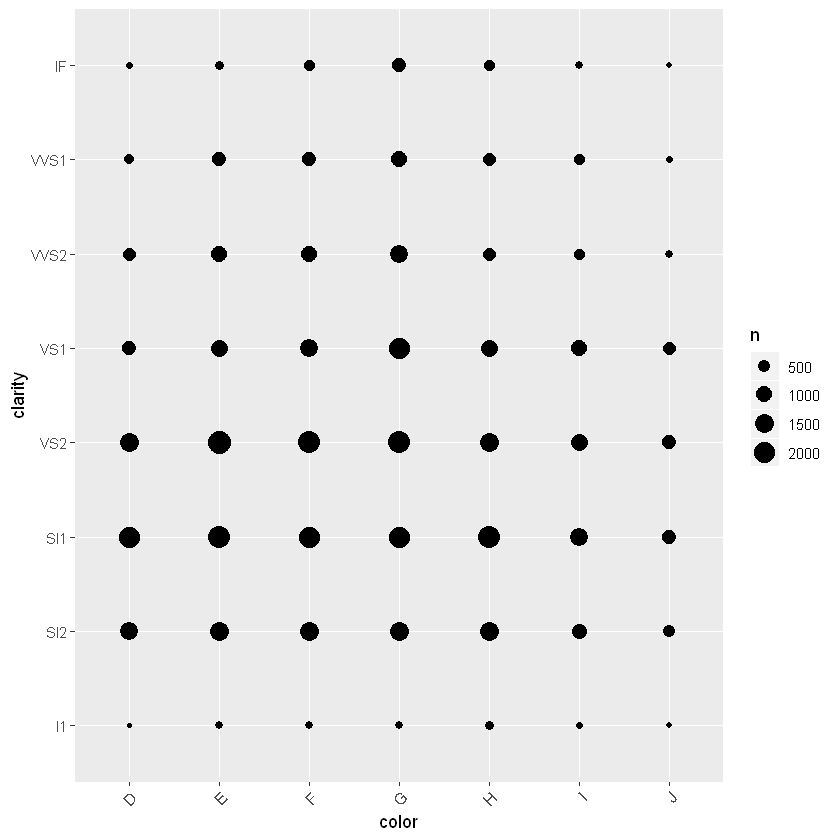

In [8]:
diamonds %>% plot_cat_cat()

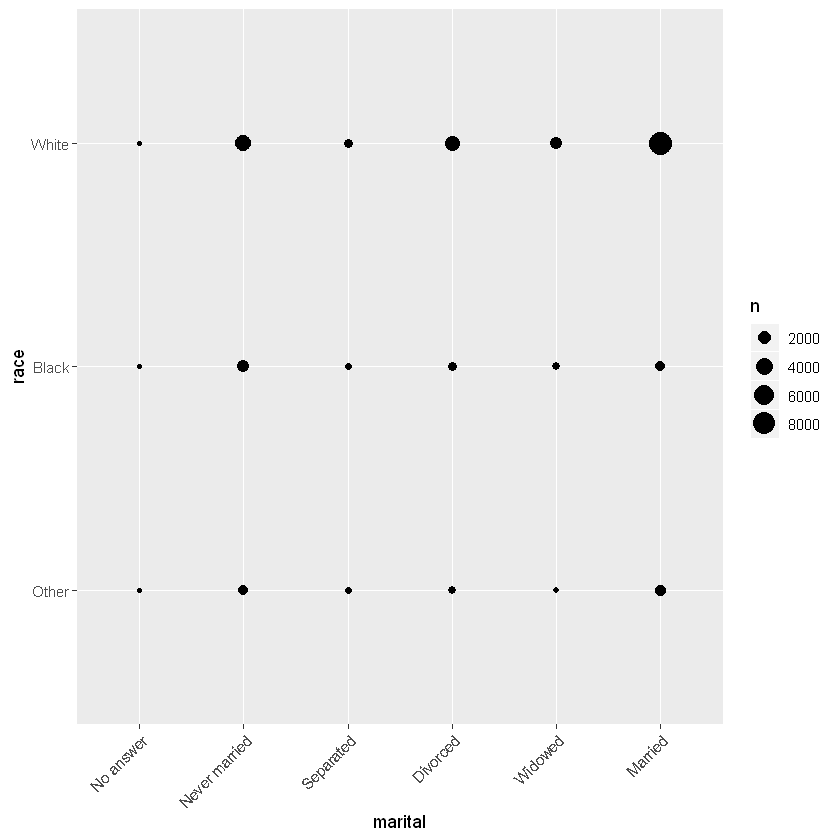

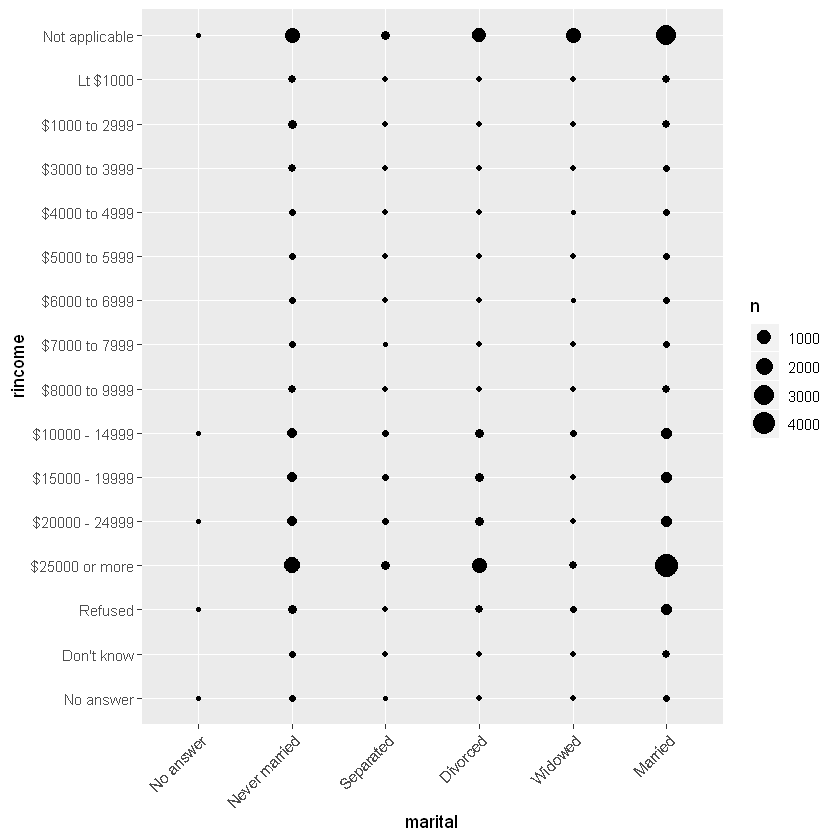

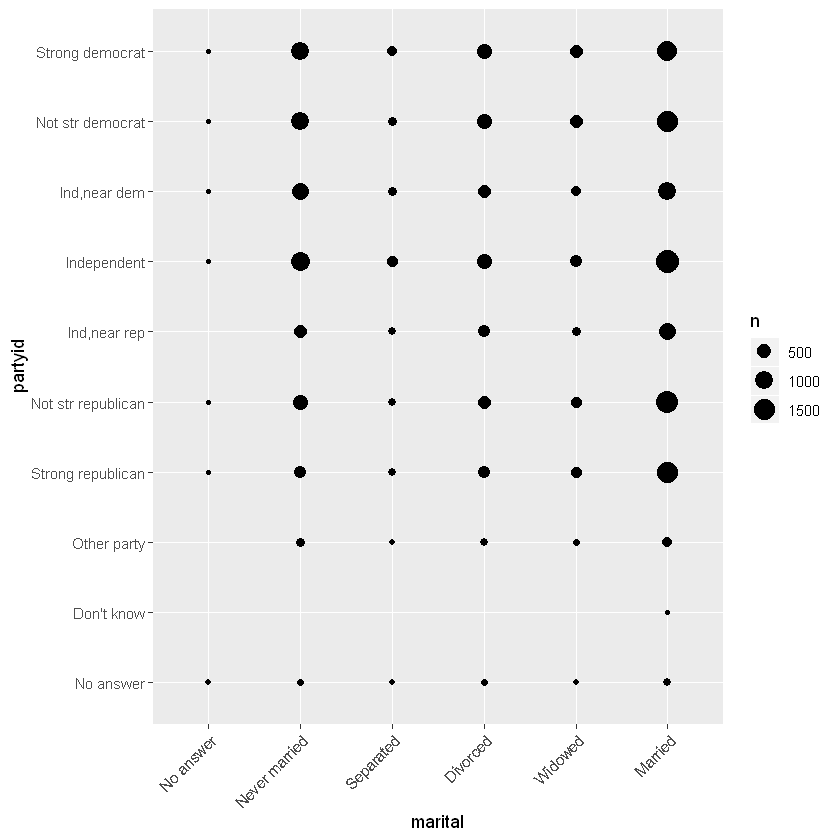

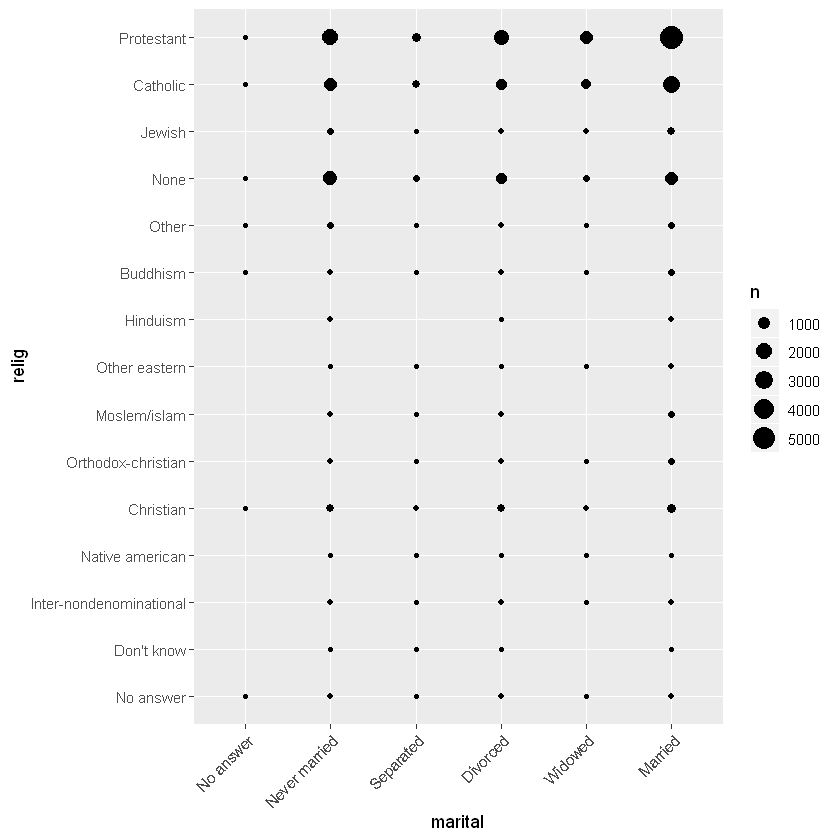

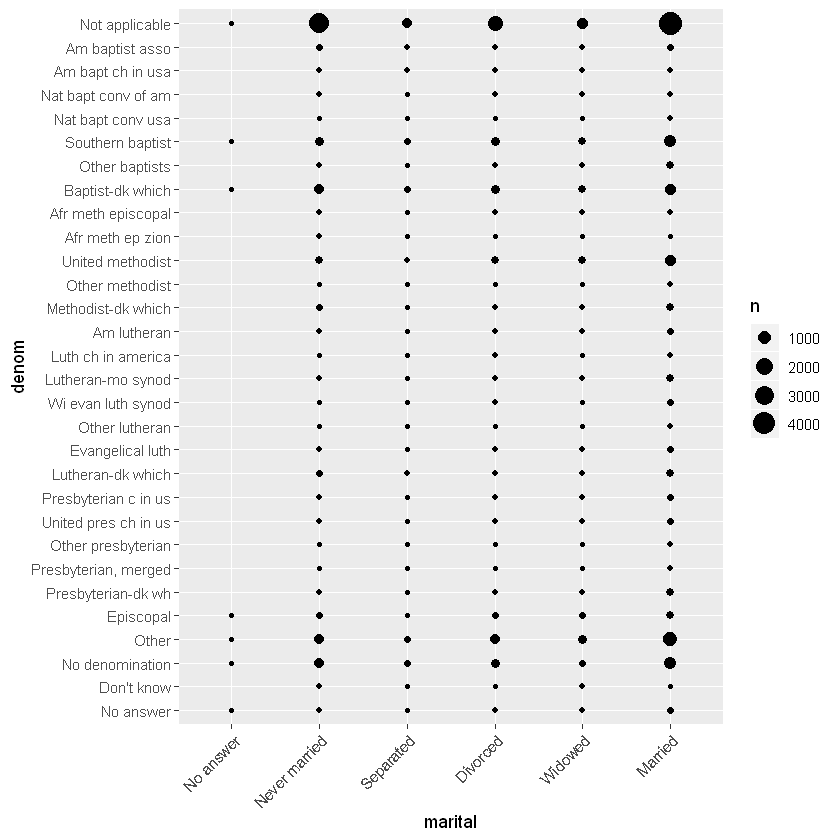

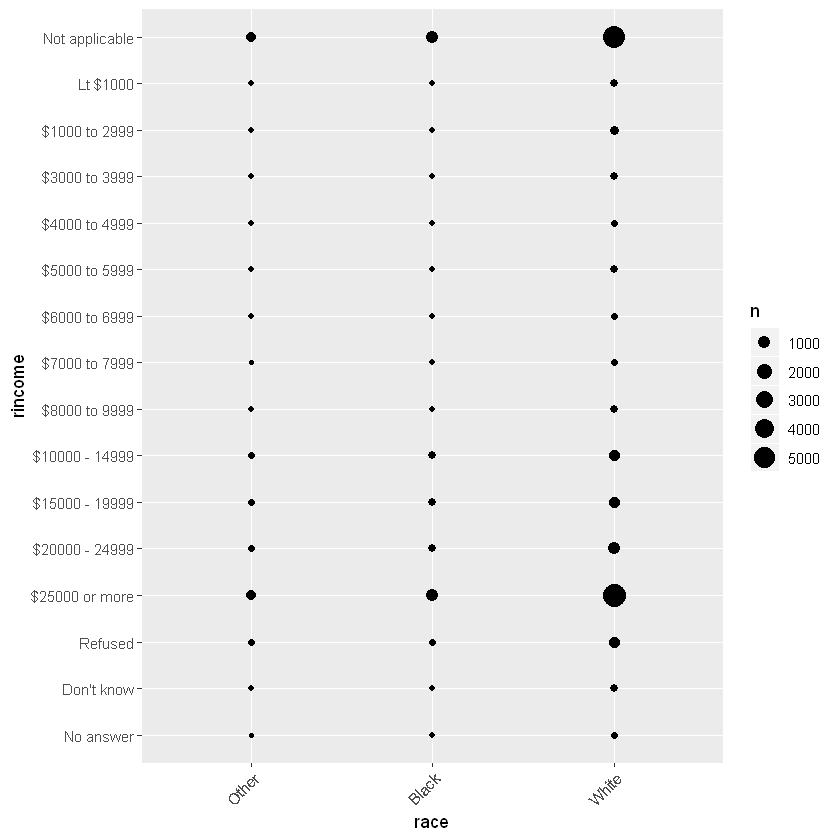

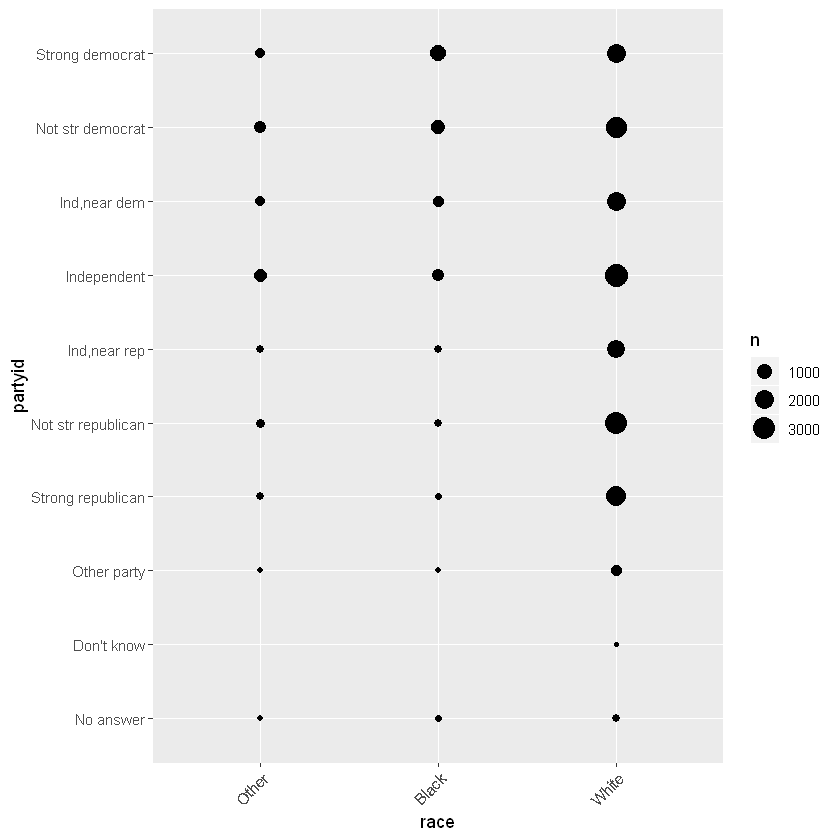

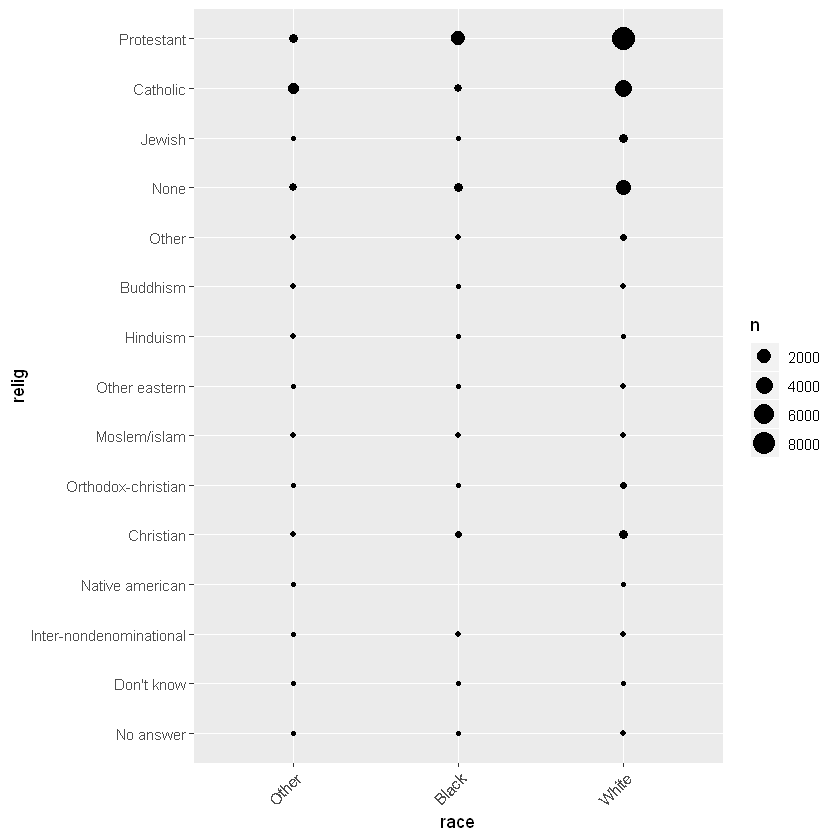

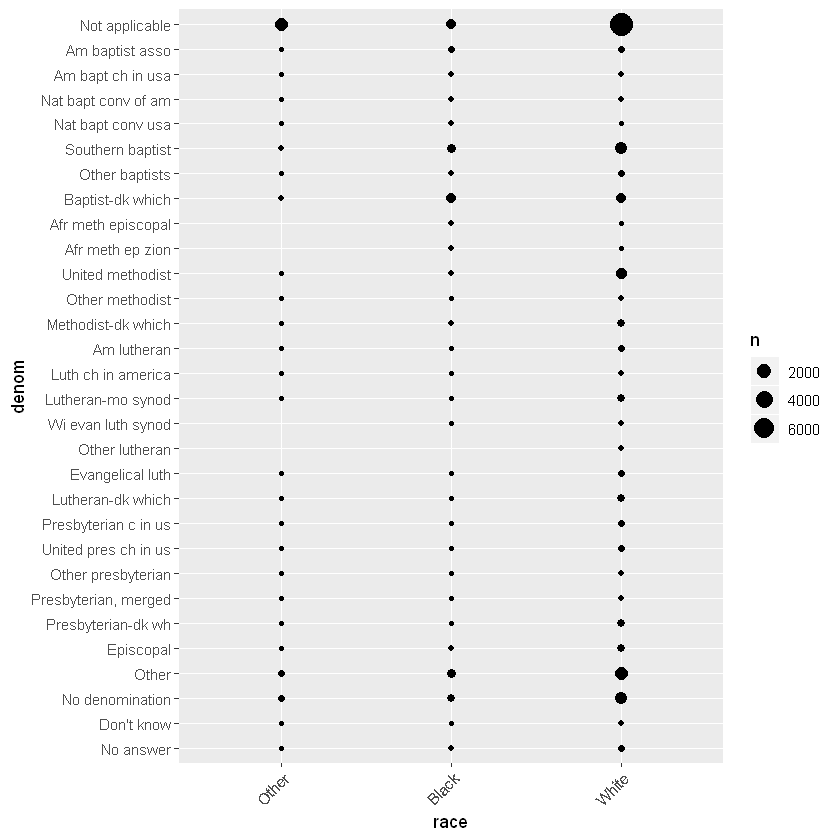

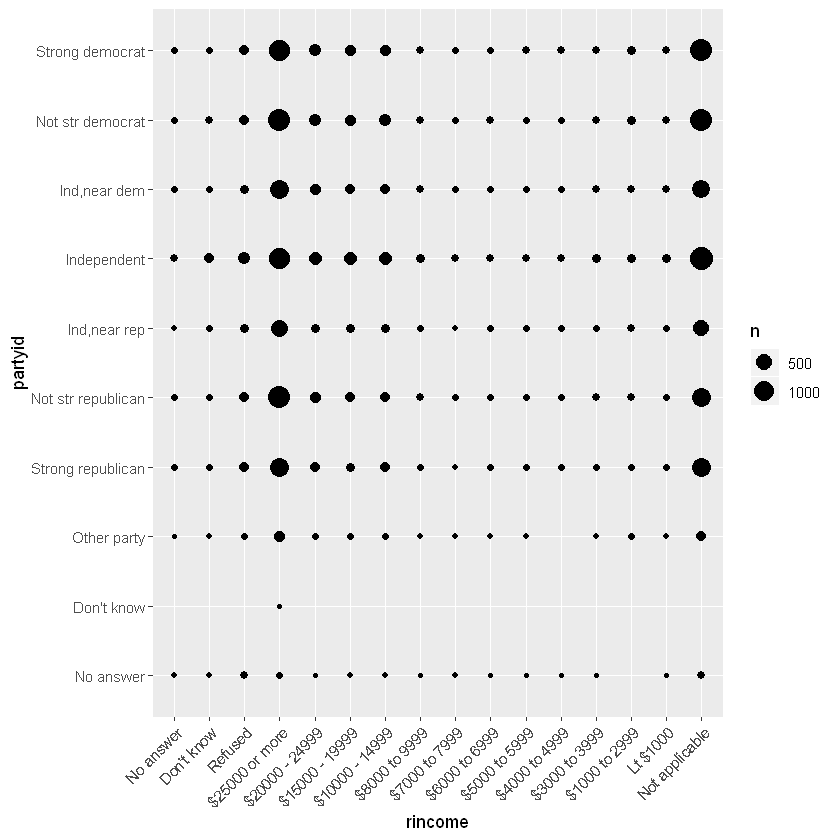

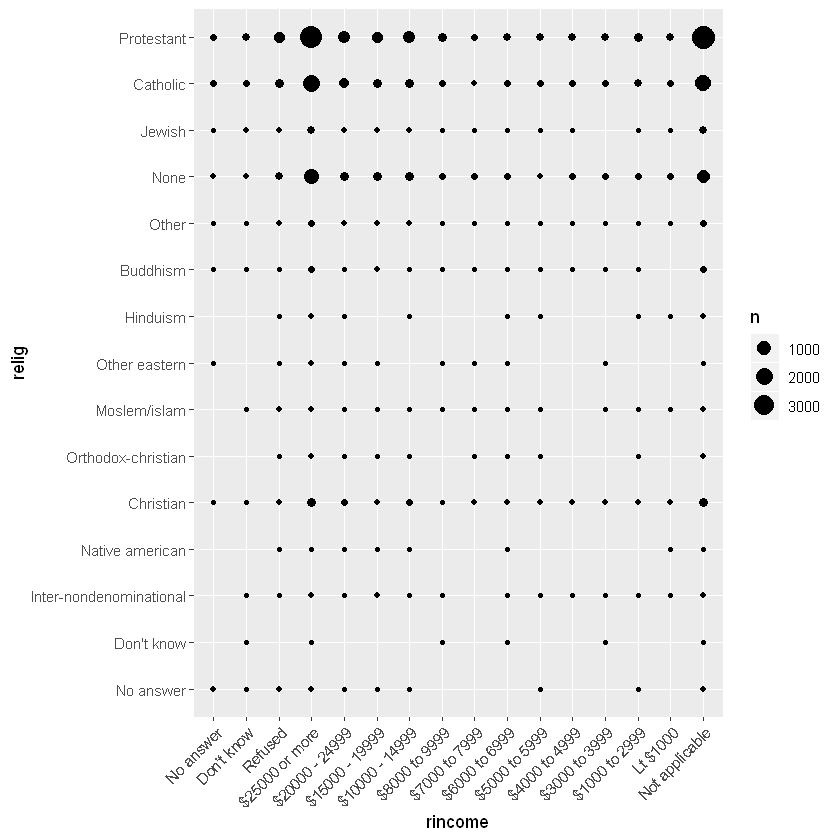

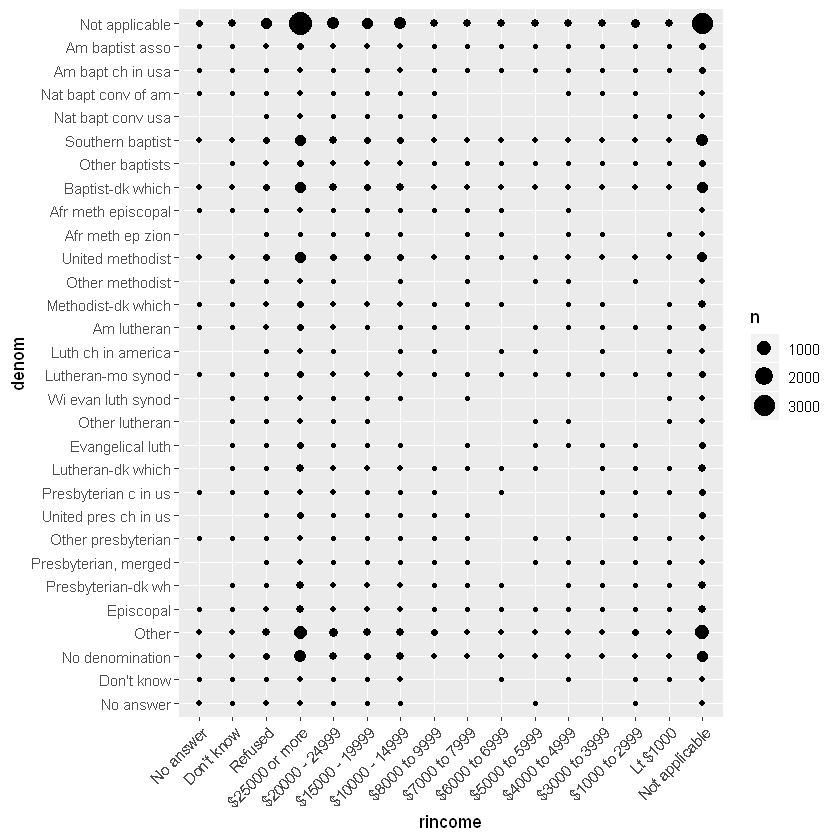

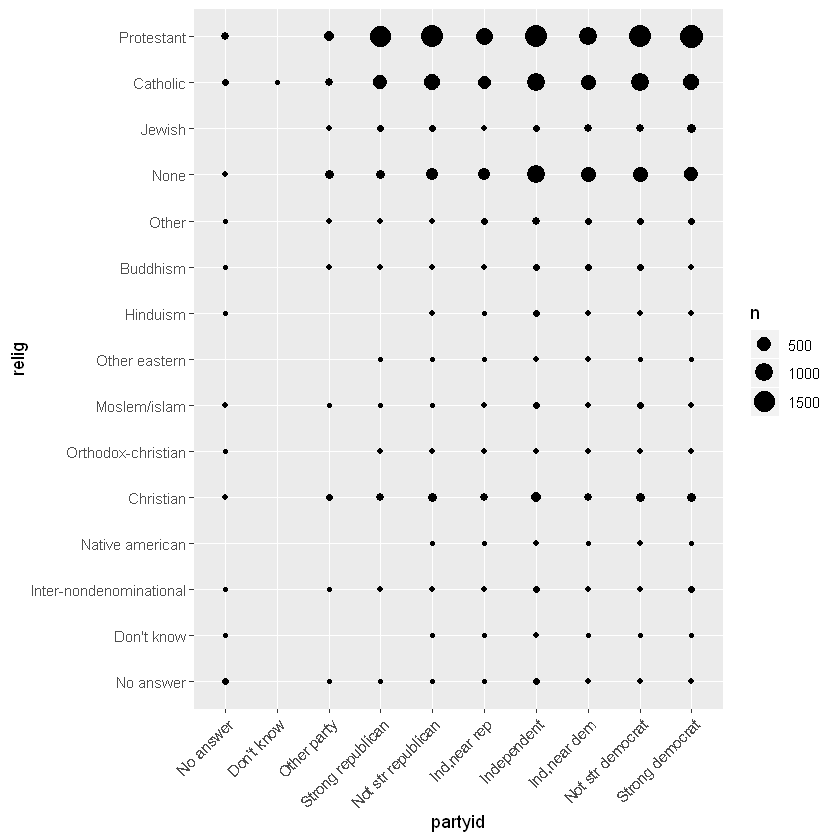

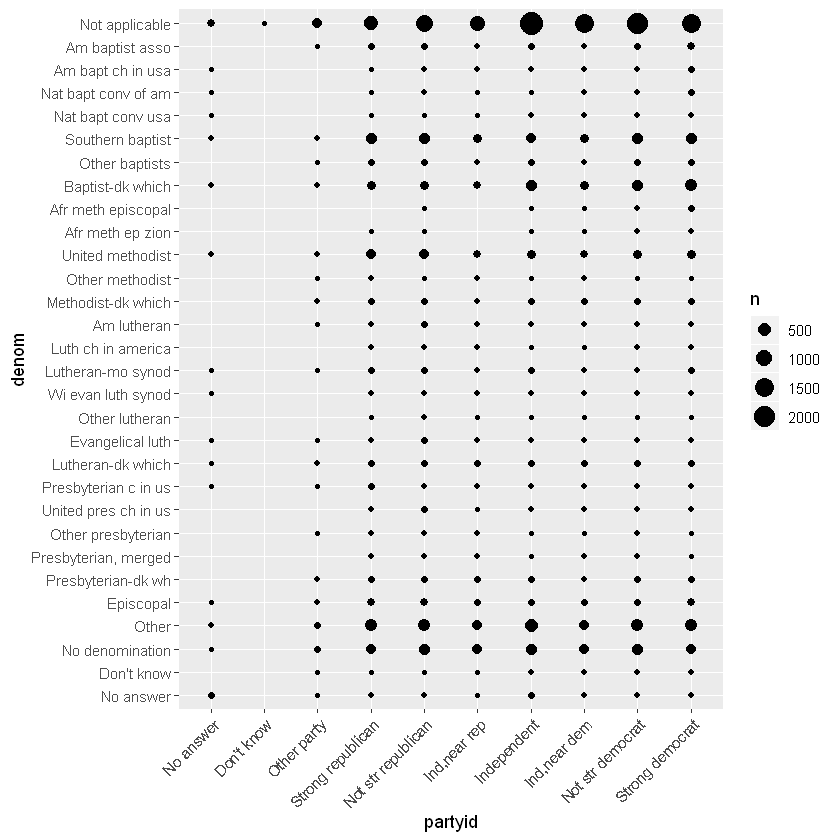

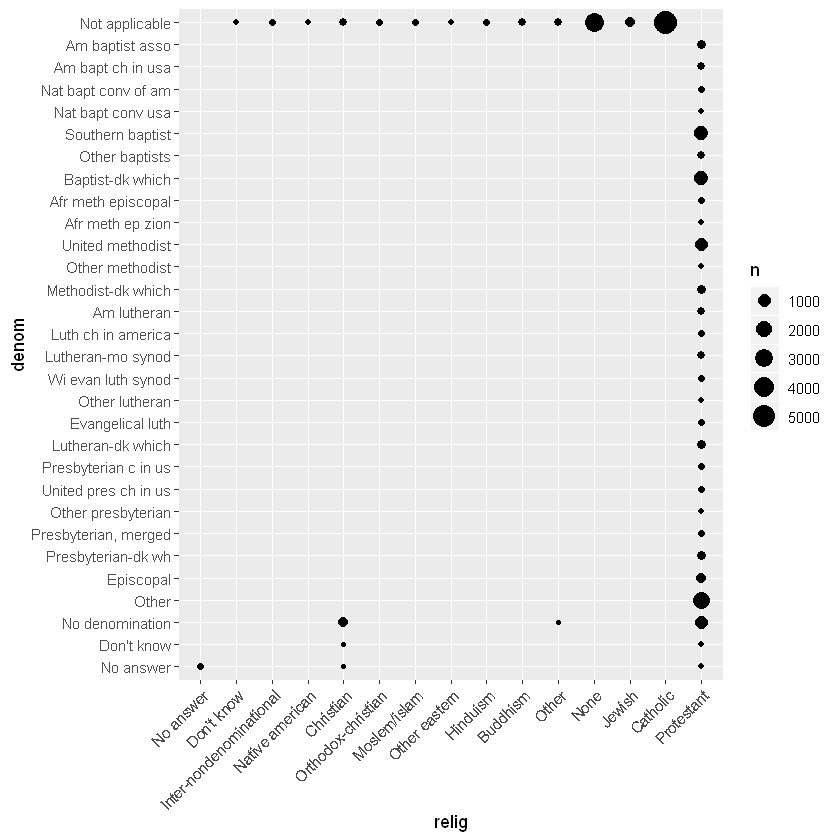

In [9]:
gss_cat %>% plot_cat_cat()

### Q3 (2 points): Standardize the columns of the following dataset. Hint: Use the following keywords:
```
function, map
```

In [23]:
#generate df, they are random numbers, and not exactly like the original print out numbers
df <- tibble(a = 3 + 10*rnorm(10000),
             b = -4 + 5*rnorm(10000),
             c = 500 + rnorm(10000),
             d = 33*rnorm(10000))

In [24]:
#original mean and sd
df %>% map(mean) %>% print()
df %>% map(sd) %>% print()

$a
[1] 2.951366

$b
[1] -4.03205

$c
[1] 499.9865

$d
[1] 0.1189431

$a
[1] 9.989993

$b
[1] 4.93608

$c
[1] 1.00594

$d
[1] 33.0234



### Method 1, writing a function then mapping it

In [31]:
# function to standardize a vector of numbers
standardize_column <- function(x){
    return((x - mean(x)) / sd(x))
}

In [26]:
df %>% map(standardize_column) %>% map(mean) %>% print()
df %>% map(standardize_column) %>% map(sd) %>% print()

$a
[1] -5.027174e-18

$b
[1] -8.681386e-17

$c
[1] -2.150702e-14

$d
[1] 6.171235e-18

$a
[1] 1

$b
[1] 1

$c
[1] 1

$d
[1] 1



### Method 2, using map and inline function

In [29]:
# use map here

In [30]:
df %>% map(function(x) (x-mean(x))/sd(x)) %>% map(mean) %>% print()
df %>% map(function(x) (x-mean(x))/sd(x)) %>% map(sd) %>% print()

$a
[1] -5.027174e-18

$b
[1] -8.681386e-17

$c
[1] -2.150702e-14

$d
[1] 6.171235e-18

$a
[1] 1

$b
[1] 1

$c
[1] 1

$d
[1] 1



### Method 3, with an iterative function 

In [33]:
# define the function here
standardize_all_cols <- function(data){
    for(i in seq_along(data)){
        data[[i]] <- (data[[i]] - mean(data[[i]])) / sd(data[[i]])
    }
    data
}

In [34]:
# function standardizes the entire tibble, one co

df %>% standardize_all_cols() %>% map(mean) %>% print()
df %>% standardize_all_cols() %>% map(sd) %>% print()

$a
[1] -5.027174e-18

$b
[1] -8.681386e-17

$c
[1] -2.150702e-14

$d
[1] 6.171235e-18

$a
[1] 1

$b
[1] 1

$c
[1] 1

$d
[1] 1

